## Figures and Axes Drill


The dataset is looking at the size of a building's solar array (in kw) vs the size of the building (in sqft).
The data was obtained (and heavily modified) from: https://catalog.data.gov/dataset/solar-on-city-facilities

For this drill, make 2 charts one on top of the other. 

The top chart will be a histogram of the size of the solar array with requirements:
- Bins small enough to see the different size 
- Add a vertical line to show the mean of the size

The bottom chart will be a scatter plot of:
- Building size on the x-axis
- Solar array size on the y-axis


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

solar_df = pd.read_csv('Solar_on_city_facilities.csv')
solar_df.head()

,Solar_kW,Bldg_sqft
0,3.08,5803
1,4.62,928
2,6.47,2011
3,77.00,2716
4,3.08,5801


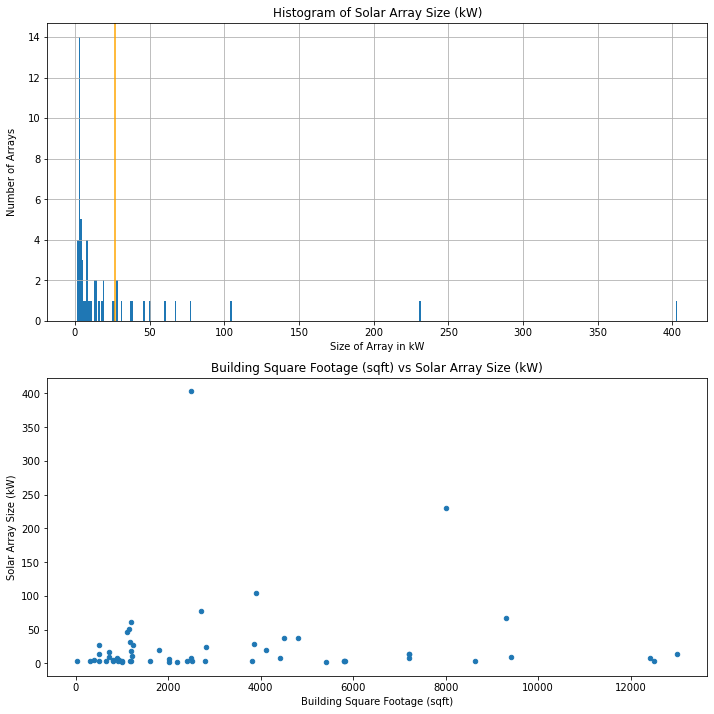

In [2]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
fig.align_labels()

solar_df['Solar_kW'].hist(ax=ax[0], bins= 400)
solar_df.plot.scatter(ax=ax[1], x='Bldg_sqft', y='Solar_kW')

ax[0].set_title("Histogram of Solar Array Size (kW)")
ax[0].set_xlabel("Size of Array in kW")
ax[0].set_ylabel("Number of Arrays")
ax[0].axvline(x=solar_df['Solar_kW'].mean(), color='orange')

ax[1].set_title("Building Square Footage (sqft) vs Solar Array Size (kW)")
ax[1].set_xlabel("Building Square Footage (sqft)")
ax[1].set_ylabel("Solar Array Size (kW)")

plt.tight_layout(pad=1)
plt.show()

Choices I made for these charts and why:

Histogram:
- Bins size: 
  - I started with the default but there are too many small number to differentiate that well in the 0-50 range. 
  - Since the highest number is around 400 I choose to look at 400 bins - this seems to work ok as the chart shows each grouping and the insights are more clear
  - I would probably make a zoomed in version of this chart from 0-50 and then make 50 bins to show that range more clearly.
- Font for the verticle line:
  - This was originally black but obscured the values behind it so I went with a lighter color so that you can still see the histogram as well as the line.
  - I would add a label / the actual number to this (or write it in a note)

Scatterplot:
- I left the default settings here and I think the chart shows up well enough
- If the dots were stacked up on one another too much, I could change the color / transparency or the symbols

### Insights:
    
Again let's look for insights that can be gained from the charts:
- Histogram:
  - The two big outliers would be good to look at (~400 kW, ~230 kW arrays)
  - Most arrays are < 10 kW
  - The mean is skewed by the outliers
  
- Scatterplot
  - I thought there would be more of a linear relationship between building size and array size
  - Interesting to me that some very large buildings still have small arrays (wonder if it could be related to roof exposure?)
  - Again the outlier of the ~400kw array being on a smaller building makes me want to check into it more (could it be a data quality issue or is that the actual array size? how/why did that building have an oversized array?)